## HR Analytics Project- Understanding the Attrition in HR

###  Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

###### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

###### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

###### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.



#### Importing the required Libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
pd.set_option('display.max_rows', None)

In [4]:
# Checking for the shape of the dataset
df.shape

(1470, 35)

- There are 1470 rows and 35 columns in the dataset including the target columns. 

In [5]:
# Getting the column details 

df.columns.values

array(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

#### Columns Description:

###### 1. Age:
Shows the age of the employee

###### 2. Attrition:
It shows the gradual loss of employees overtime.

###### 3. BusinessTravel:
Shows the business travels by the employees.

###### 4. DailyRate:

###### 5. Department:
Shows the department in the employee works.

###### 6. DistanceFromHome:
Shows the distance between the home and workplace of the employees.

###### 7. Education:
Shows the education level of the employees.

###### 8. EducationField:
Shows the education field of the employees.

###### 9. EmployeeCount:


###### 10. EmployeeNumber:


###### 11. EnvironmentSatisfaction:

###### 12. Gender:
Shows the gender of the employees.

###### 13. HourlyRate:


###### 14. JobInvolvement:


###### 15. JobLevel:


###### 16. JobRole:
Shows the role of the employee.

###### 17. JobSatisfaction:


###### 18. MaritalStatus:
Shows whether the employee is married or unmarried.

###### 19. MonthlyIncome:
Shows the monthly income of the employees.

###### 20. MonthlyRate:


###### 21. NumCompaniesWorked:
Shows the total number of companies in which the employees had worked with.

###### 22. Over18:


###### 23. OverTime:


###### 24. PercentSalaryHike:


###### 25. PerformanceRating:


###### 26. RelationshipSatisfaction:


###### 27. StandardHours:


###### 28. StockOptionLevel:


###### 29. TotalWorkingYears:
Shows the total exprience of the employees.

###### 30. TrainingTimesLastYear:


###### 31. WorkLifeBalance:


###### 32. YearsAtCompany:
Shows the number of years spend by the employees in the current company.

###### 33. YearsInCurrentRole:
Shows the number of years working in his/her current role.

###### 34. YearsSinceLastPromotion:
Shows the number of year since the last promotion.

###### 35. YearsWithCurrManager:
Shows the number of years employee is worked under the current manager.

In [6]:
# Checking for the missing values in the dataset.

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- The above observation shows that there is no missing values in the dataset.

In [7]:
# Checking the information about the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

- There is no missing values as said earlier.

- The dataset contains integer datatype and object datatype values.

- There are total 9 object datatype and 26 integer datatype coulmns in the dataset.

#### Checking for the balance of target coulmn.

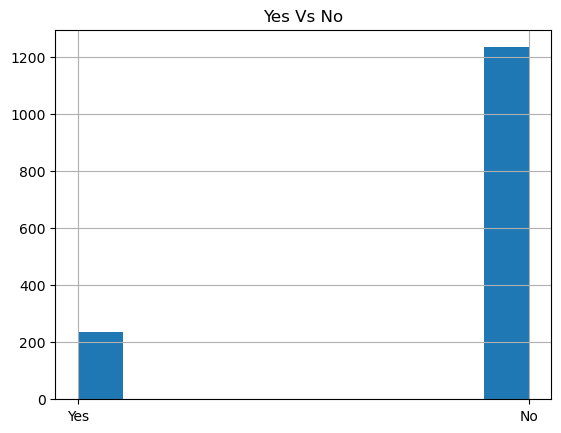

In [8]:
df['Attrition'].hist(grid=True)
plt.title('Yes Vs No')
plt.show()

- The histogram shows that the data is not balanced.

In [9]:
# Dropping column 'EmployeeCount', 'Over18', 'StandardHours' as it is not contributing to the 'Attrition'

df = df.drop(['EmployeeCount','Over18', 'StandardHours', 'EmployeeNumber'], axis=1)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [10]:
# Checking for numerical and categorical features.

nf = df.select_dtypes(include=[np.number]).columns
cf = df.select_dtypes(include=[np.object]).columns

print('Numerical features in the dataset is :',nf)
print('Categorical features in the dataset is :', cf)

Numerical features in the dataset is : Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Categorical features in the dataset is : Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')


#### Label Encoding:

In [11]:
# LabelEncoder on 'Attrition' column

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


#### Data Visualization:

###### 1. 'Age' and 'Attrition'

In [12]:
# Getting the relations between the 'Age' and 'Attrition'
df.groupby('Age')['Attrition'].mean()

Age
18    0.500000
19    0.666667
20    0.545455
21    0.461538
22    0.312500
23    0.285714
24    0.269231
25    0.230769
26    0.307692
27    0.062500
28    0.291667
29    0.264706
30    0.150000
31    0.260870
32    0.180328
33    0.206897
34    0.116883
35    0.128205
36    0.086957
37    0.120000
38    0.034483
39    0.142857
40    0.087719
41    0.150000
42    0.043478
43    0.062500
44    0.181818
45    0.048780
46    0.121212
47    0.125000
48    0.105263
49    0.083333
50    0.166667
51    0.105263
52    0.166667
53    0.105263
54    0.000000
55    0.136364
56    0.214286
57    0.000000
58    0.357143
59    0.000000
60    0.000000
Name: Attrition, dtype: float64

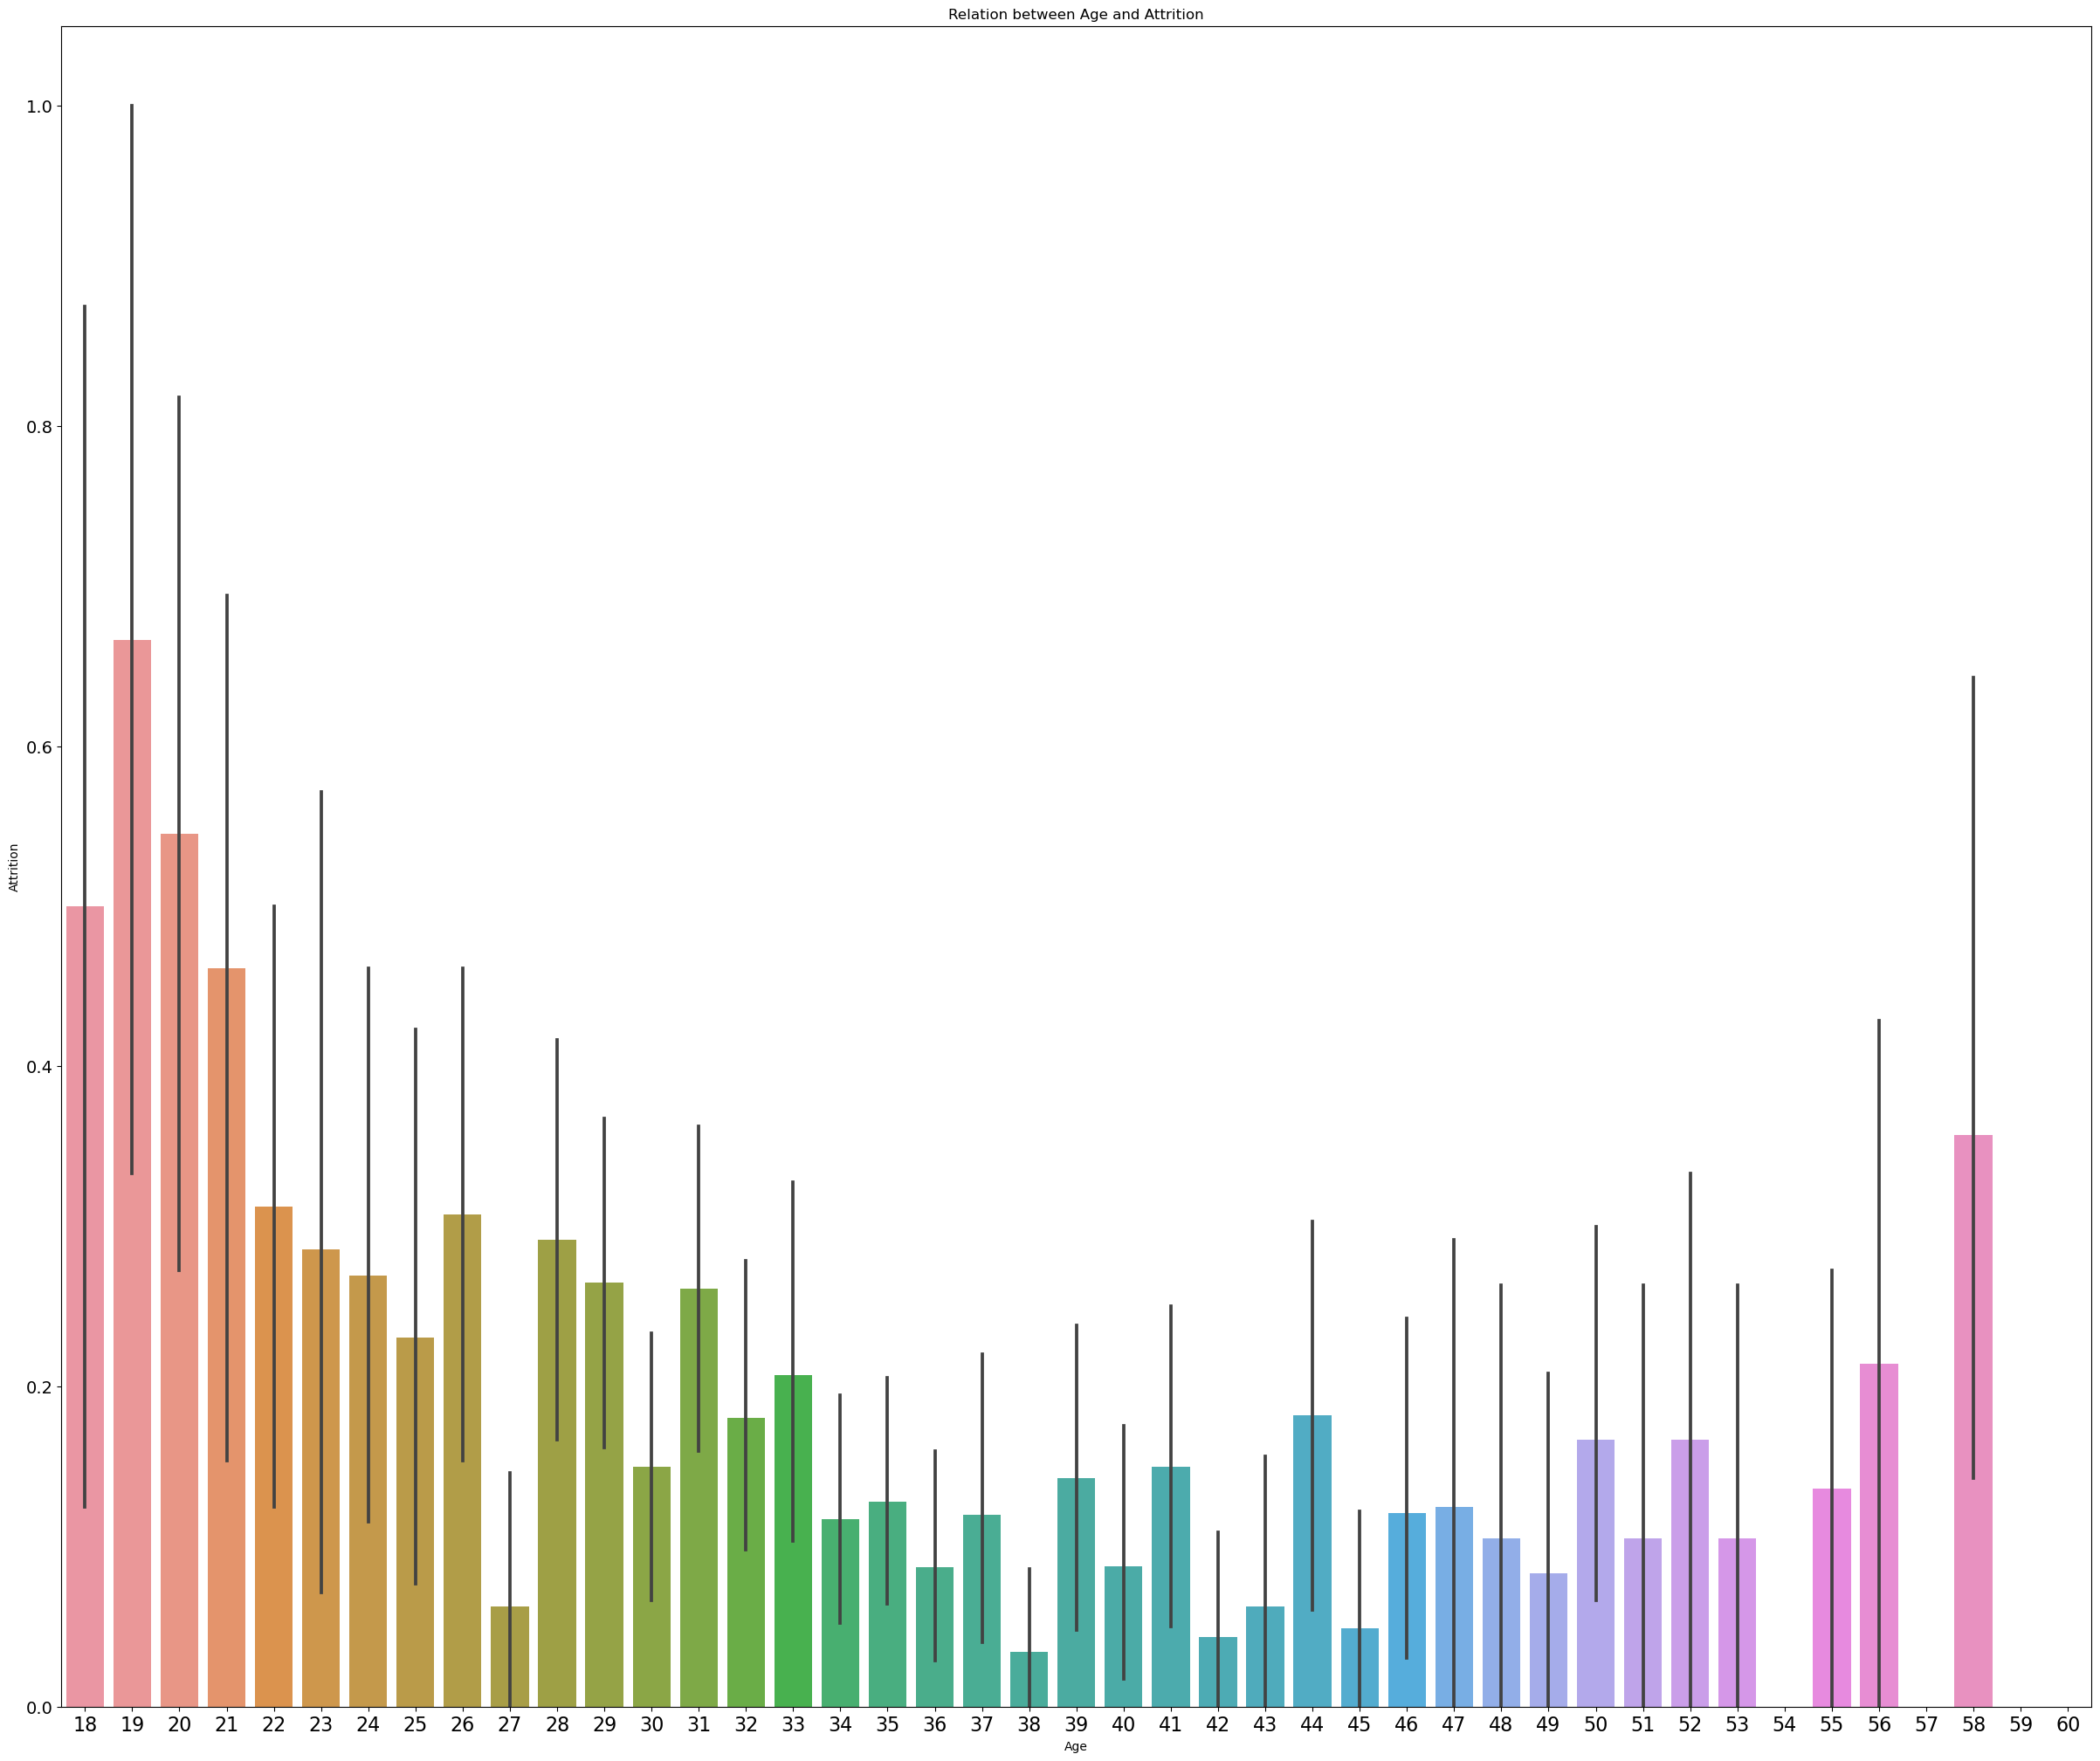

In [13]:
# Plotting graph to see the relation between 'Age' and 'Attrition'
plt.figure(figsize=[30,25])
sns.barplot(x='Age', y='Attrition', data=df)
plt.xticks(fontsize = 16)
plt.yticks(fontsize= 14)
plt.title('Relation between Age and Attrition')
plt.show()

- From the graph we can say that the rate of attrition is high among the age group of 18 to 21.
- The rate of attrition is low among the age group of 34 to 53.

###### 2. 'Business Travel' Vs 'Attrition'

In [14]:
# Getting the relations between the 'BusinessTravel' and 'Attrition'
df.groupby('BusinessTravel')['Attrition'].mean()

BusinessTravel
Non-Travel           0.080000
Travel_Frequently    0.249097
Travel_Rarely        0.149569
Name: Attrition, dtype: float64

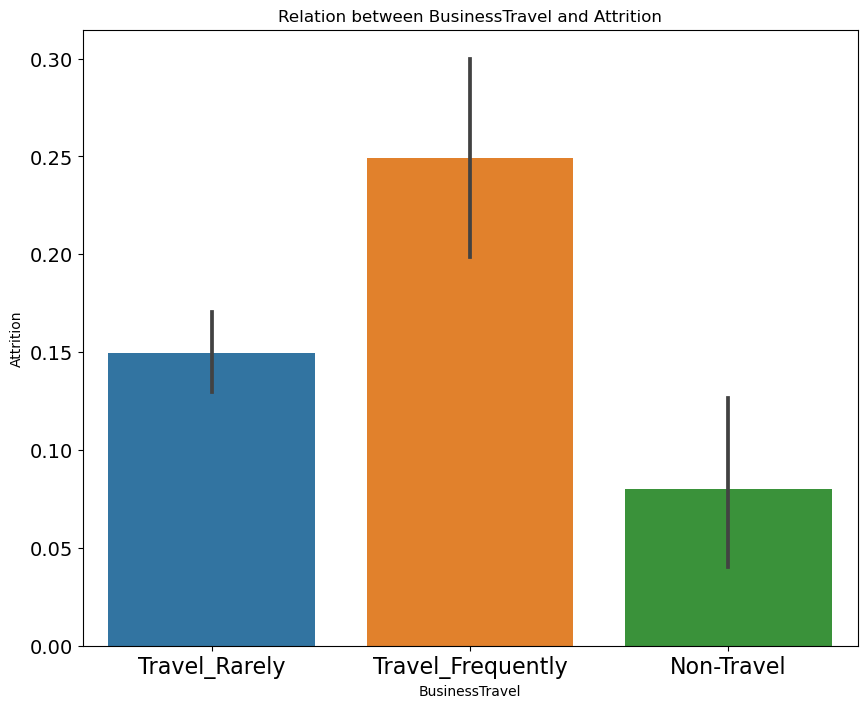

In [15]:
# Plotting graph to see the relation between 'BusinessTravel' and 'Attrition'
plt.figure(figsize=[10,8])
sns.barplot(x='BusinessTravel', y='Attrition', data=df)
plt.xticks(fontsize = 16)
plt.yticks(fontsize= 14)
plt.title('Relation between BusinessTravel and Attrition')

plt.show()

- From the above observation we can say that the rate of attrition is high among the employee who travel freduently for business.

- The rate of attrition is low among the employee who do not travel for business.

#### 3. 'Department' vs 'Attrition'

In [16]:
# Getting the relations between the 'Department' and 'Attrition'

df.groupby('Department')['Attrition'].mean()

Department
Human Resources           0.190476
Research & Development    0.138398
Sales                     0.206278
Name: Attrition, dtype: float64

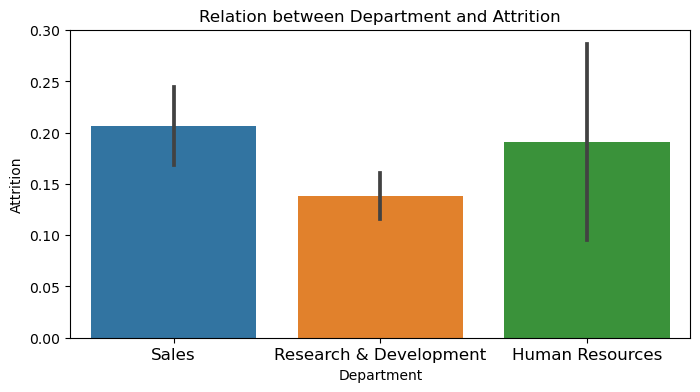

In [17]:
# Plotting the graph to show the relation between the 'Department' and 'Attrition'

plt.figure(figsize=[8,4])
sns.barplot(x='Department', y='Attrition', data =df)
plt.xticks(fontsize =12)
plt.yticks(fontsize =10)
plt.title('Relation between Department and Attrition')

plt.show()

- The rate of attrition is low among the employee of Research and Development.

- The rate of attrition is almost same among the employee of Sales and HR department.

#### 4. 'EducationField' Vs 'Attrition'

In [18]:
# Getting the relation between the 'EducationField' and 'Attrition'
df.groupby('EducationField')['Attrition'].mean()

EducationField
Human Resources     0.259259
Life Sciences       0.146865
Marketing           0.220126
Medical             0.135776
Other               0.134146
Technical Degree    0.242424
Name: Attrition, dtype: float64

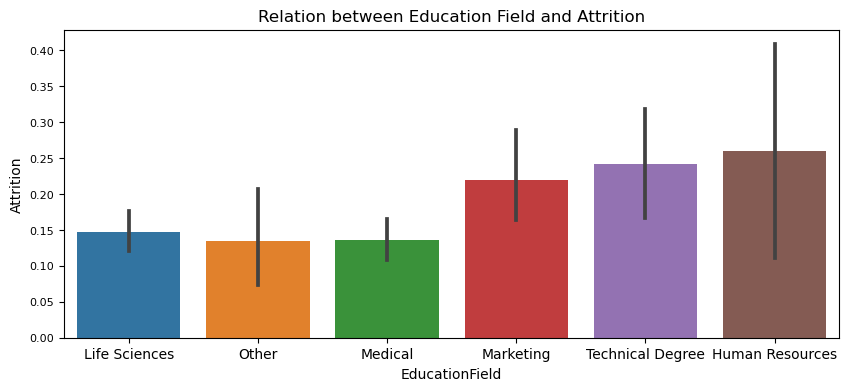

In [19]:
# Plotting grapgh to show the relation between 'EducationField' and 'Attrition'
plt.figure(figsize=[10,4])
sns.barplot(x='EducationField', y='Attrition', data=df)
plt.xticks(fontsize =10)
plt.yticks(fontsize =8)
plt.title('Relation between Education Field and Attrition')

plt.show()

- The rate of attrition is high among the employee with the education field HR, technical and Marketing respectively.

- The rate of attrition is low among the employee with the education field Other, Medical and Life Sciences.

#### 5. 'Gender' Vs 'Attrition'

In [20]:
# Getting the relations between the 'Gender' and 'Attrition'
df.groupby('Gender')['Attrition'].mean()

Gender
Female    0.147959
Male      0.170068
Name: Attrition, dtype: float64

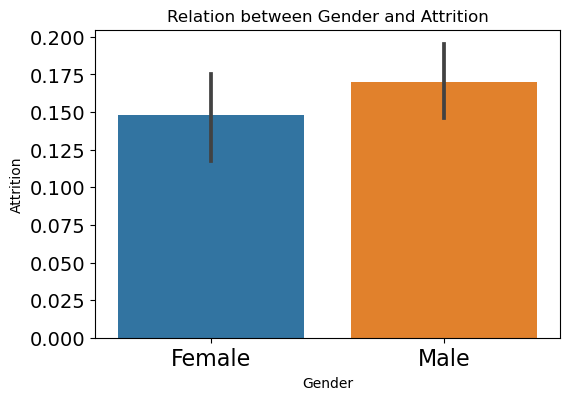

In [21]:
# Plotting graph to see the relation between 'Age' and 'Attrition'
plt.figure(figsize=[6,4])
sns.barplot(x='Gender', y='Attrition', data=df)
plt.xticks(fontsize = 16)
plt.yticks(fontsize= 14)
plt.title('Relation between Gender and Attrition')

plt.show()

- From the above observation we can say that the rate of attrition is high among the males as compared to the females.

#### 6. 'JobRole' Vs 'Attrition

In [22]:
# Getting the relation between 'JobRole' and 'Attrition'

df.groupby('JobRole')['Attrition'].mean()

JobRole
Healthcare Representative    0.068702
Human Resources              0.230769
Laboratory Technician        0.239382
Manager                      0.049020
Manufacturing Director       0.068966
Research Director            0.025000
Research Scientist           0.160959
Sales Executive              0.174847
Sales Representative         0.397590
Name: Attrition, dtype: float64

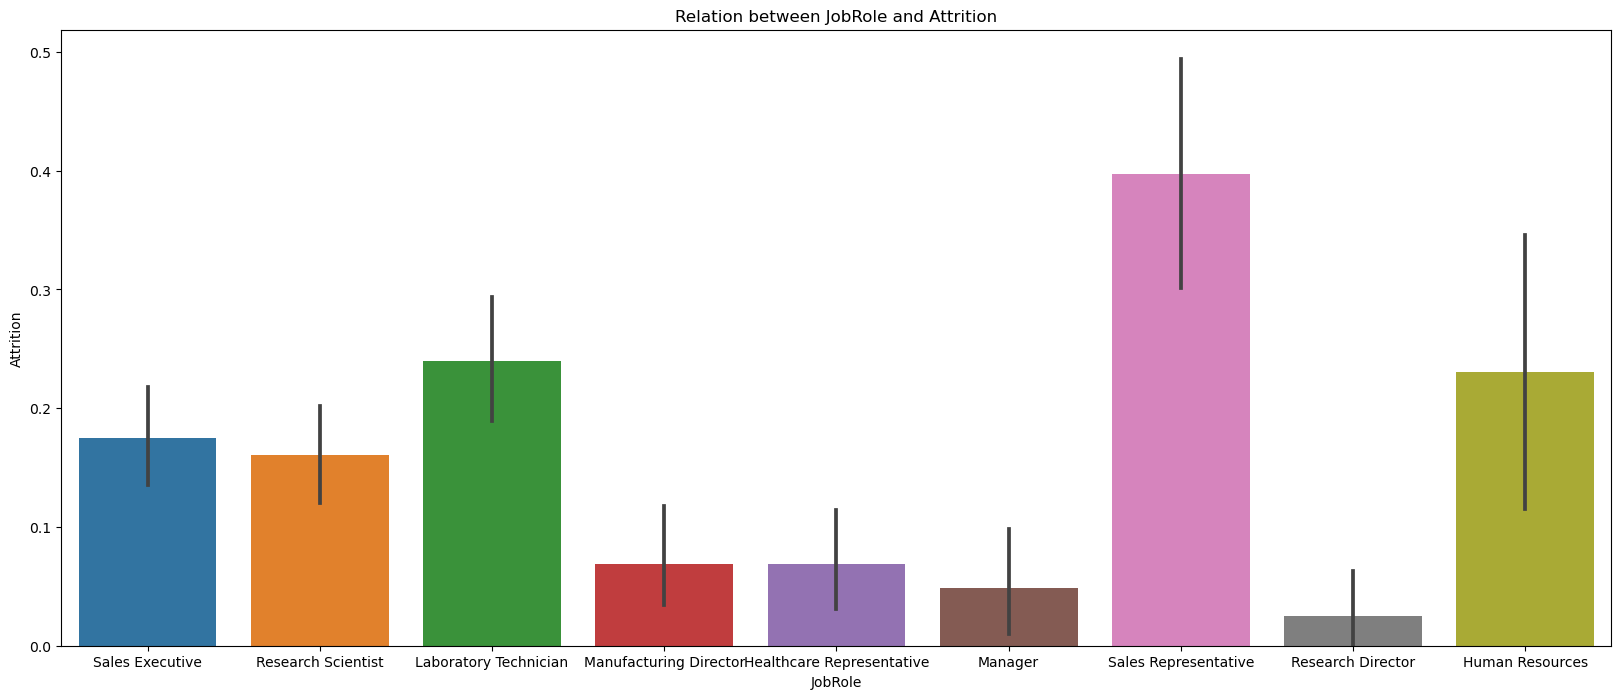

In [23]:
# Plotting the graph to show the relation between 'JobRole' and 'Attrition'

plt.figure(figsize=[20,8])
sns.barplot(x='JobRole', y='Attrition', data =df)
plt.xticks(fontsize =10)
plt.yticks(fontsize =10)
plt.title('Relation between JobRole and Attrition')

plt.show()

- The graph shows that the rate of attrition is high among the sales Representatives.

- The employees having the Job role Research Director has least chance of attrition.

#### 7. 'MaritalStatus' Vs 'Attrition'

In [24]:
# Getting the relation between the 'MaritalStatus' and 'Attrition'

df.groupby('MaritalStatus')['Attrition'].mean()

MaritalStatus
Divorced    0.100917
Married     0.124814
Single      0.255319
Name: Attrition, dtype: float64

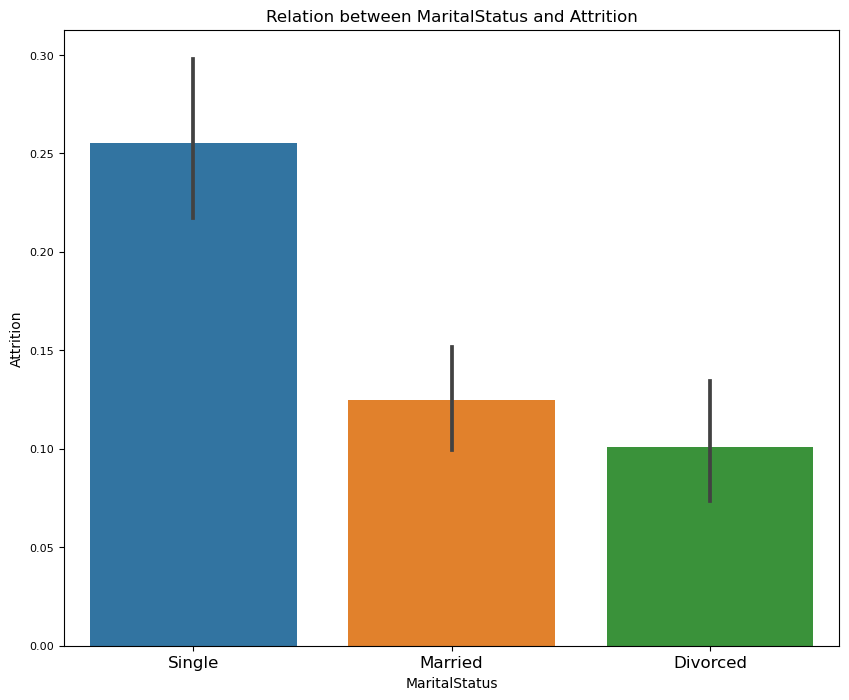

In [25]:
# Plotting the graph to show the relation between the 'MaritalStatus' and 'Attrition'

plt.figure(figsize=[10,8])

sns.barplot(x='MaritalStatus', y='Attrition', data =df)

plt.xticks(fontsize=12)
plt.yticks(fontsize=8)
plt.title('Relation between MaritalStatus and Attrition')

plt.show()

- Unmarried employees have the maximum chance of attrition.

- Divorced employees have the minimum chance of attrition.

#### 8. 'OverTime' Vs 'Attrition'

In [26]:
# Getting the relation between 'OverTime' and 'Attrition'

df.groupby('OverTime')['Attrition'].mean()

OverTime
No     0.104364
Yes    0.305288
Name: Attrition, dtype: float64

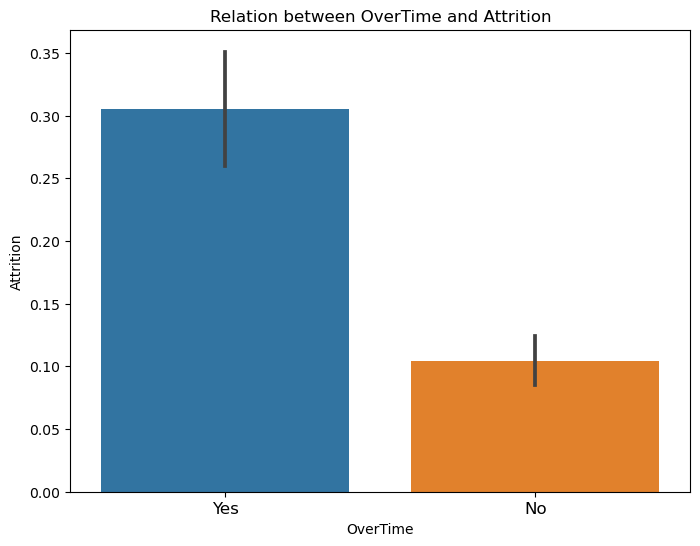

In [27]:
# Plotting the graph to show the relation between 'OverTime' and 'Attrition'

plt.figure(figsize=[8,6])

sns.barplot(x='OverTime', y='Attrition', data =df)

plt.xticks(fontsize =12)
plt.yticks(fontsize =10)
plt.title('Relation between OverTime and Attrition')

plt.show()

- The graph shows that the employee who are engaged in overtime have the higher chance of attrition.

#### Checking all variables at once:

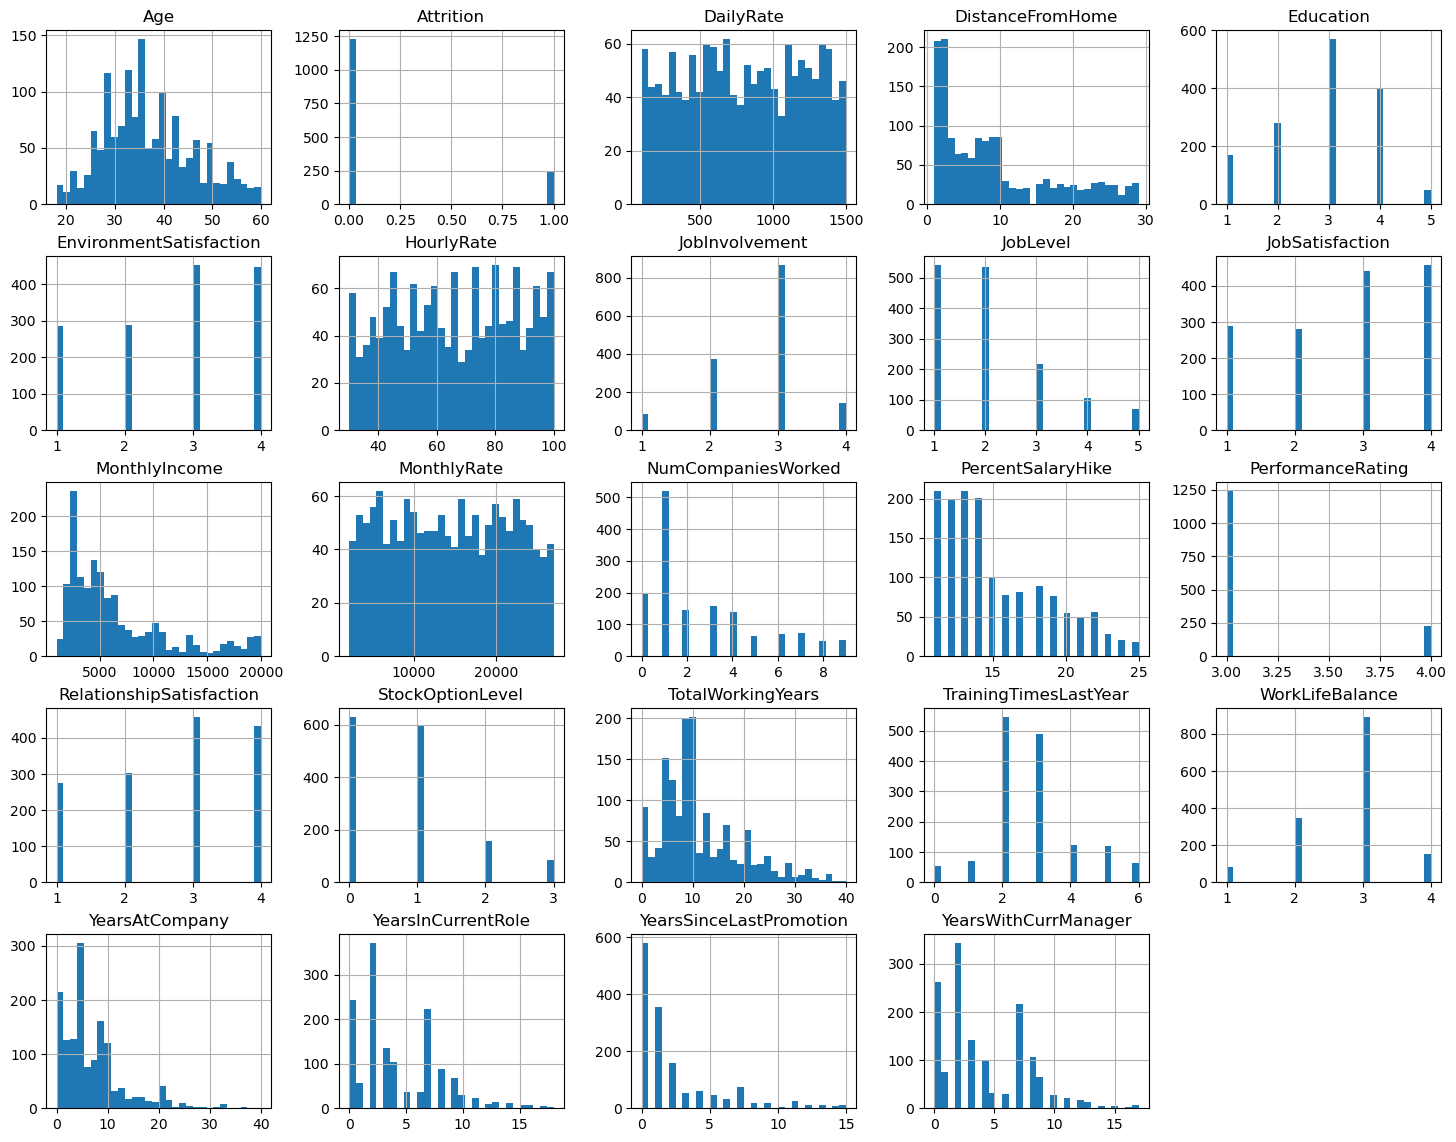

In [28]:
# Plotting the histogram for univariant analysis to check the normal distribution

df.hist(figsize=[18,14], bins=30, grid=True)
plt.show()

#### Label Encoding the categorical columns:

In [29]:
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Gender'] = le.fit_transform(df['Gender'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['OverTime'] = le.fit_transform(df['OverTime'])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [30]:
# Checking the description of the dataset.

df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


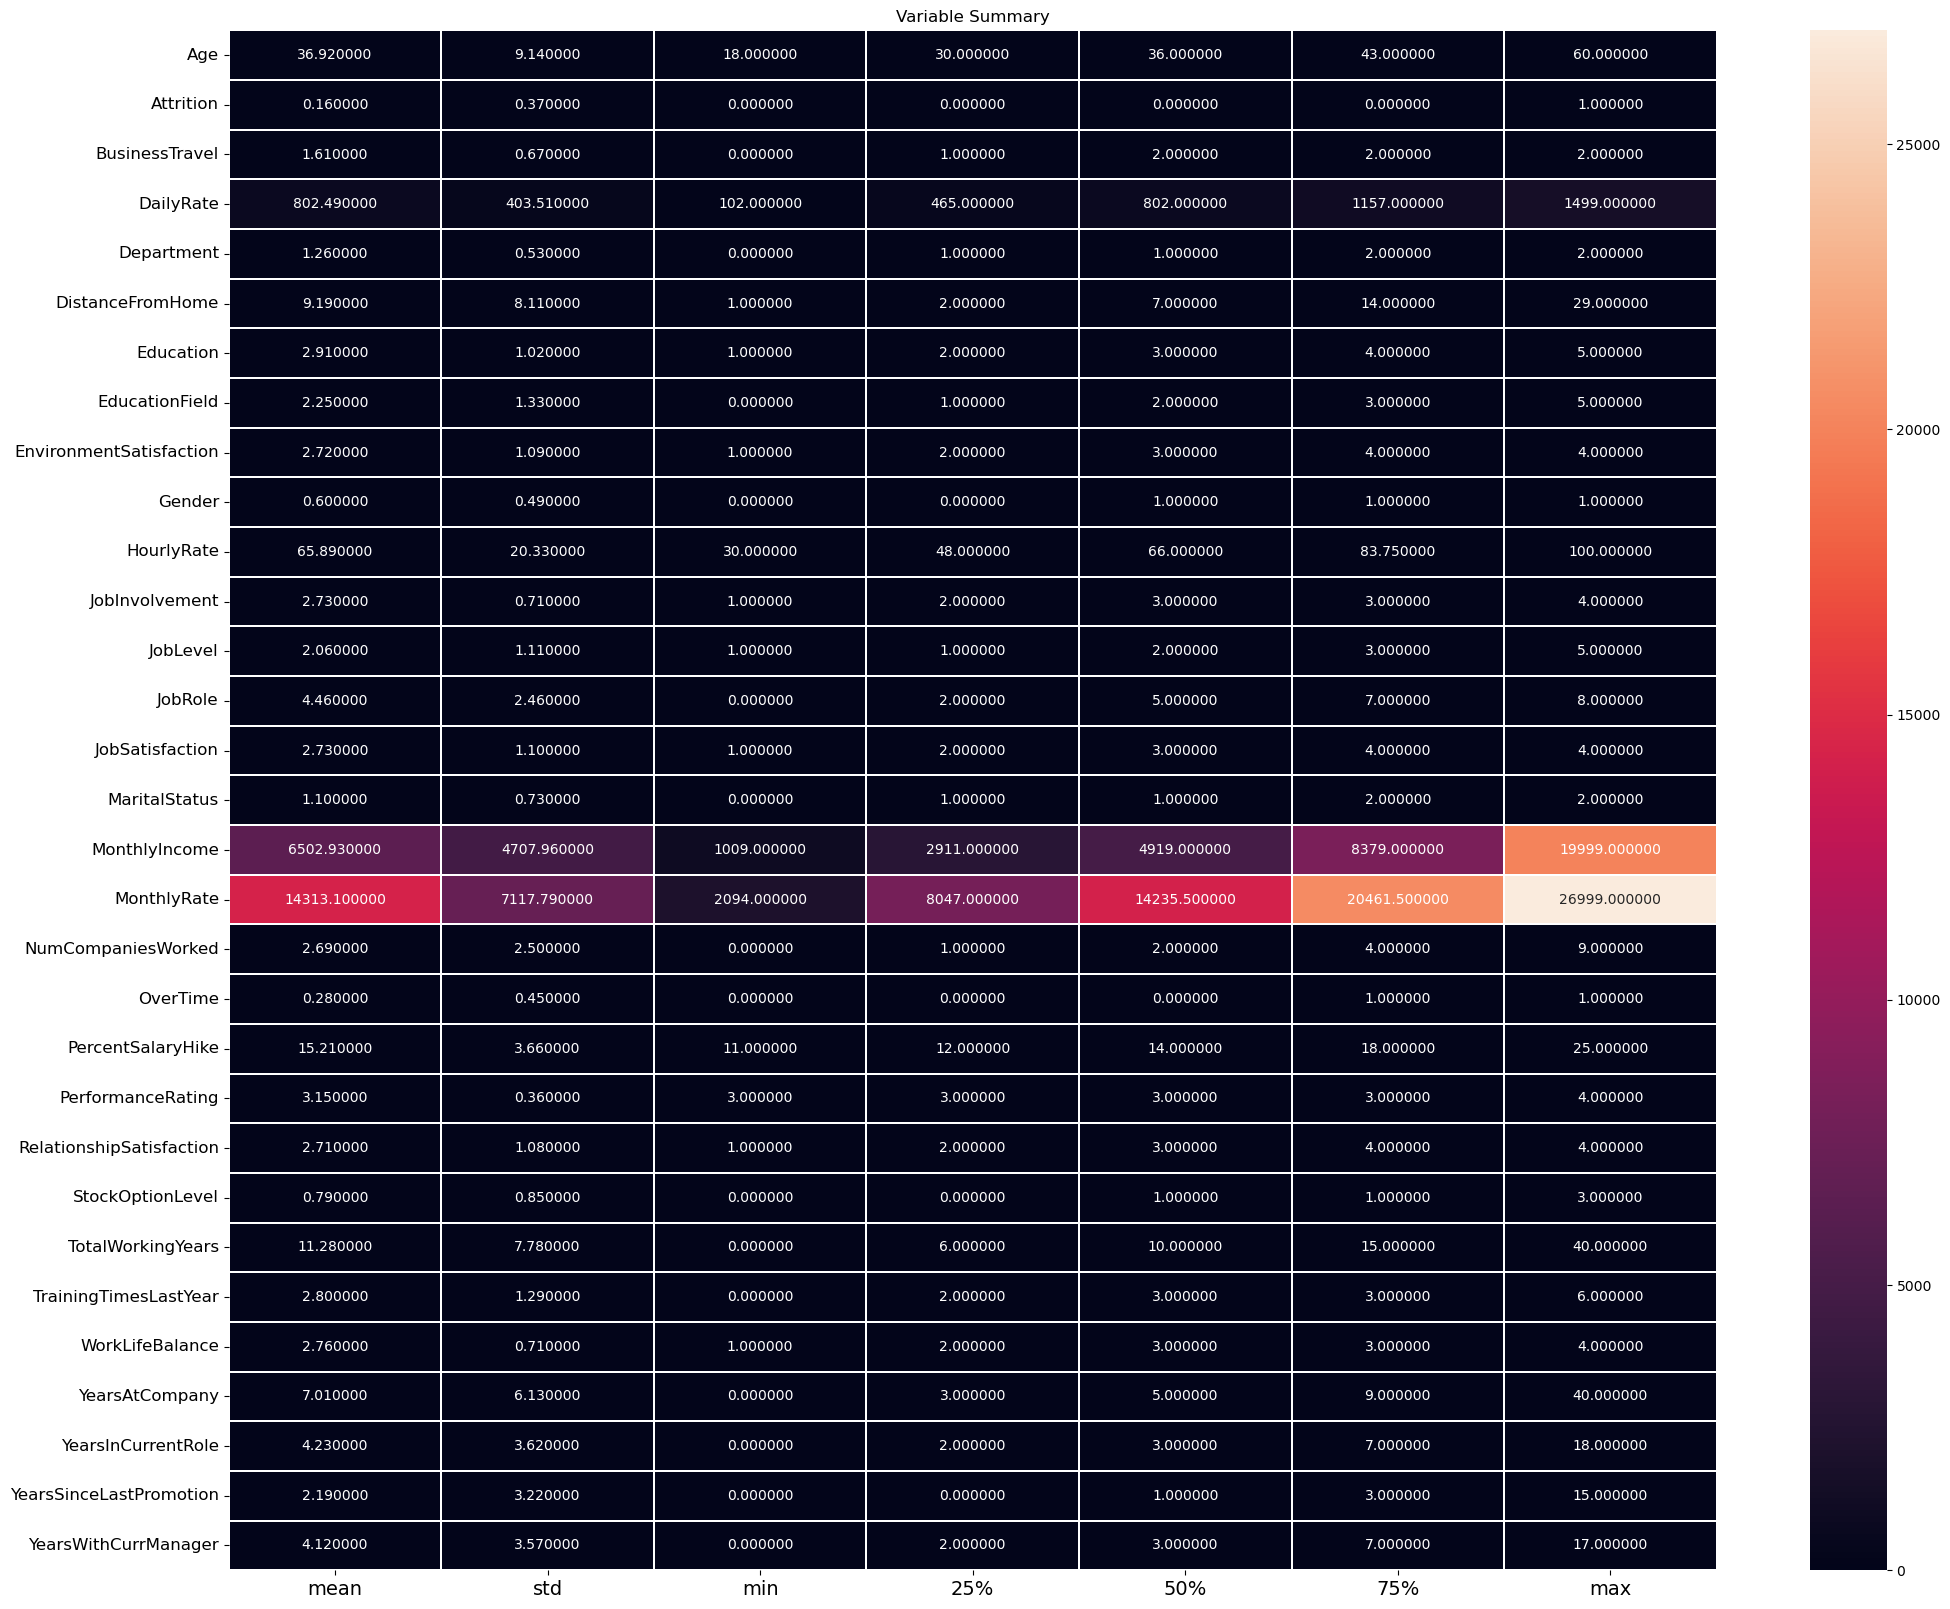

In [31]:
# Description using heatmap.

plt.figure(figsize=(24,20))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidths=0.2, annot=True, fmt='f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.title('Variable Summary')
plt.show()

#### Checking for the Correlation:

In [32]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


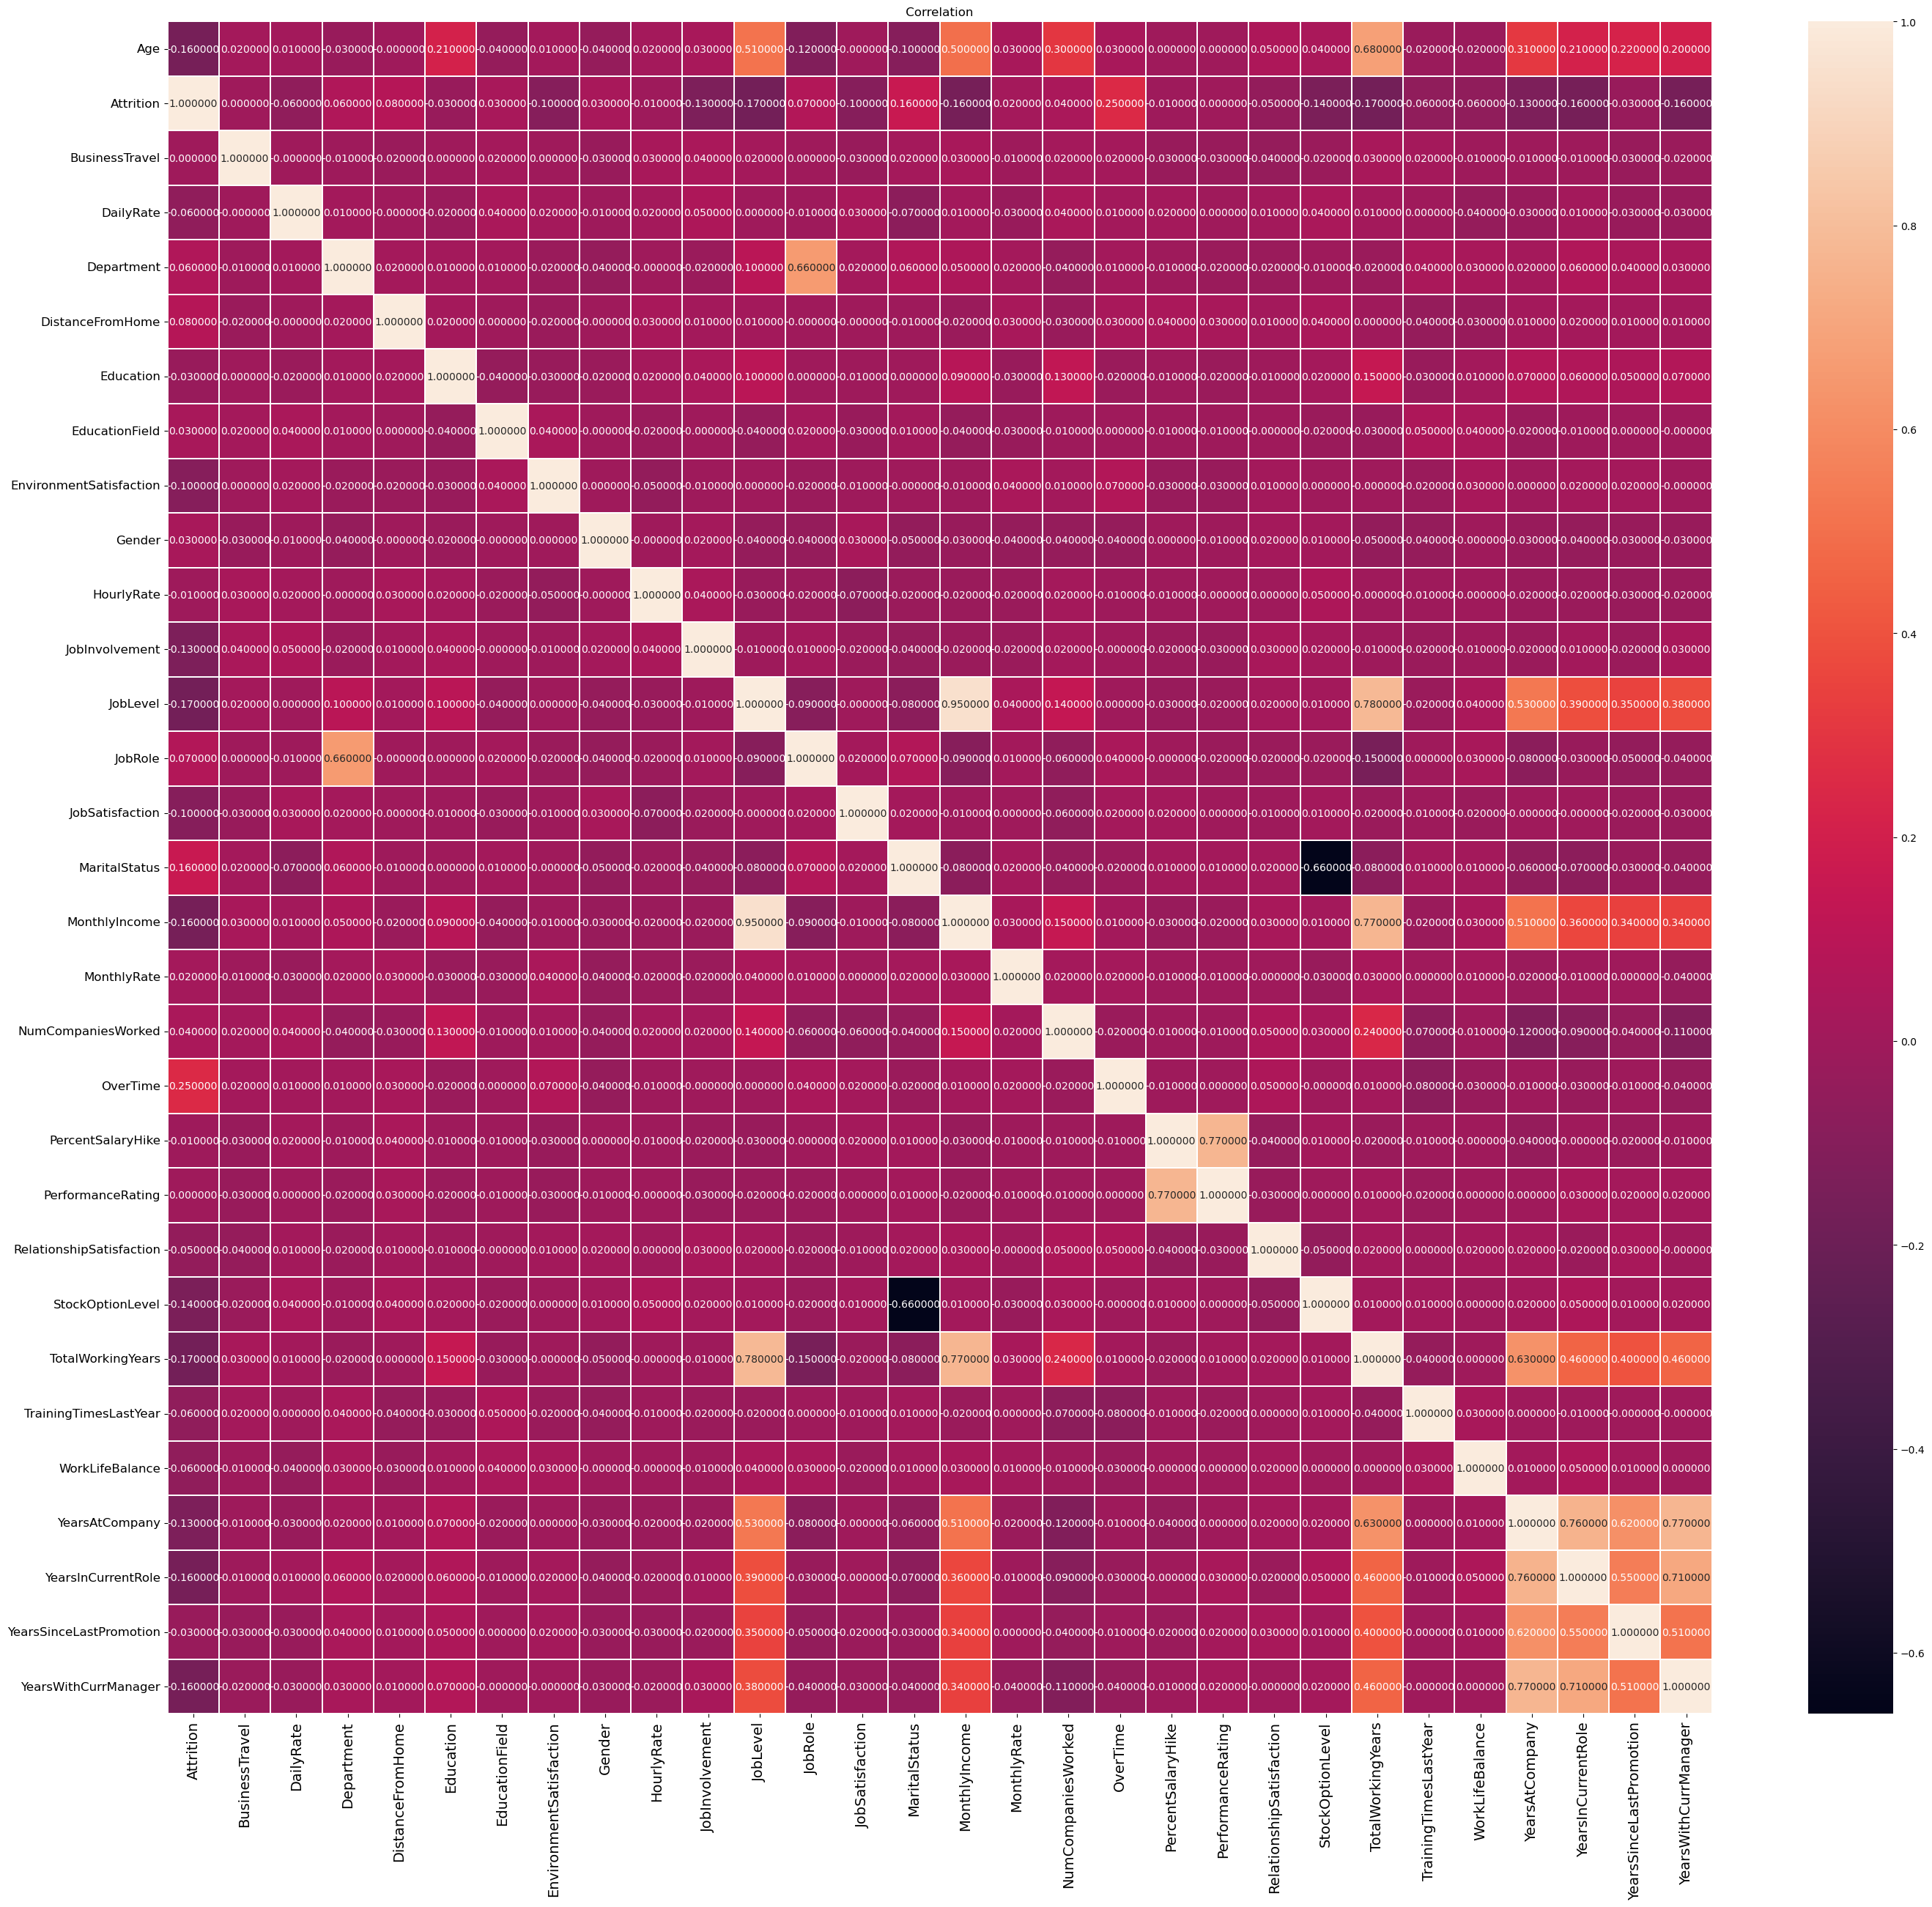

In [33]:
# Plotting heatmap for correlation table.

plt.figure(figsize=[34,30])
sns.heatmap(round(df.corr()[1:].transpose(),2), linewidths=0.2, annot=True, fmt='f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.title(' Correlation ')

plt.show()

In [34]:
corr_matrix = df.corr()
corr_matrix['Attrition'].sort_values(ascending = False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
M

#### Outcome of Correlation table:

- Maximum correlation is with the 'Overtime' column approx 25%.
- Minimum correlation is with the 'TotalWorkingYears' column approx -17%.

#### Checking for the Outliers and Skewness in the dataset

In [35]:
# Splitting the independent and dependent columns

x = df.drop(['Attrition'], axis =1)
y = df['Attrition']

In [36]:
# Checking for the Skewness

x.skew()

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
Y

#### Outcome of Skewness:

Skewness threshold is taken as +/-0.5. Columns having shewness:

    1. BusinessTravel
    2. DistanceFromHome
    3. EducationField
    4. JobLevel
    5. MonthlyIncome
    6. NumCompaniesWorked
    7. OverTime
    8. PercentSalaryHike
    9. PerformanceRating
    10. StockOptionLevel
    11. TrainingTimesLastYear
    12. WorkLifeBalance
    13. YearsAtCompany
    14. YearsInCurrentRole
    15. YearsSinceLastPromotion
    16. YearsWithCurrManager


#### Removing the skewness from the dataset:

We're using power_transform function to remove skewness from the dataset.

In [37]:
from sklearn.preprocessing import power_transform

df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns=x.columns)

df_new.skew()

Age                        -0.007603
BusinessTravel             -0.970506
DailyRate                  -0.196160
Department                  0.013801
DistanceFromHome           -0.007468
Education                  -0.099881
EducationField             -0.008386
EnvironmentSatisfaction    -0.205395
Gender                     -0.408665
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobLevel                    0.103624
JobRole                    -0.319659
JobSatisfaction            -0.212815
MaritalStatus              -0.156911
MonthlyIncome               0.032831
MonthlyRate                -0.184087
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           0.000000
RelationshipSatisfaction   -0.193634
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
WorkLifeBalance            -0.012286
YearsAtCompany             -0.008683
Y

- We can see that after using the function power_transform the skewness is removed from the dataset.

#### Checking for the outliers

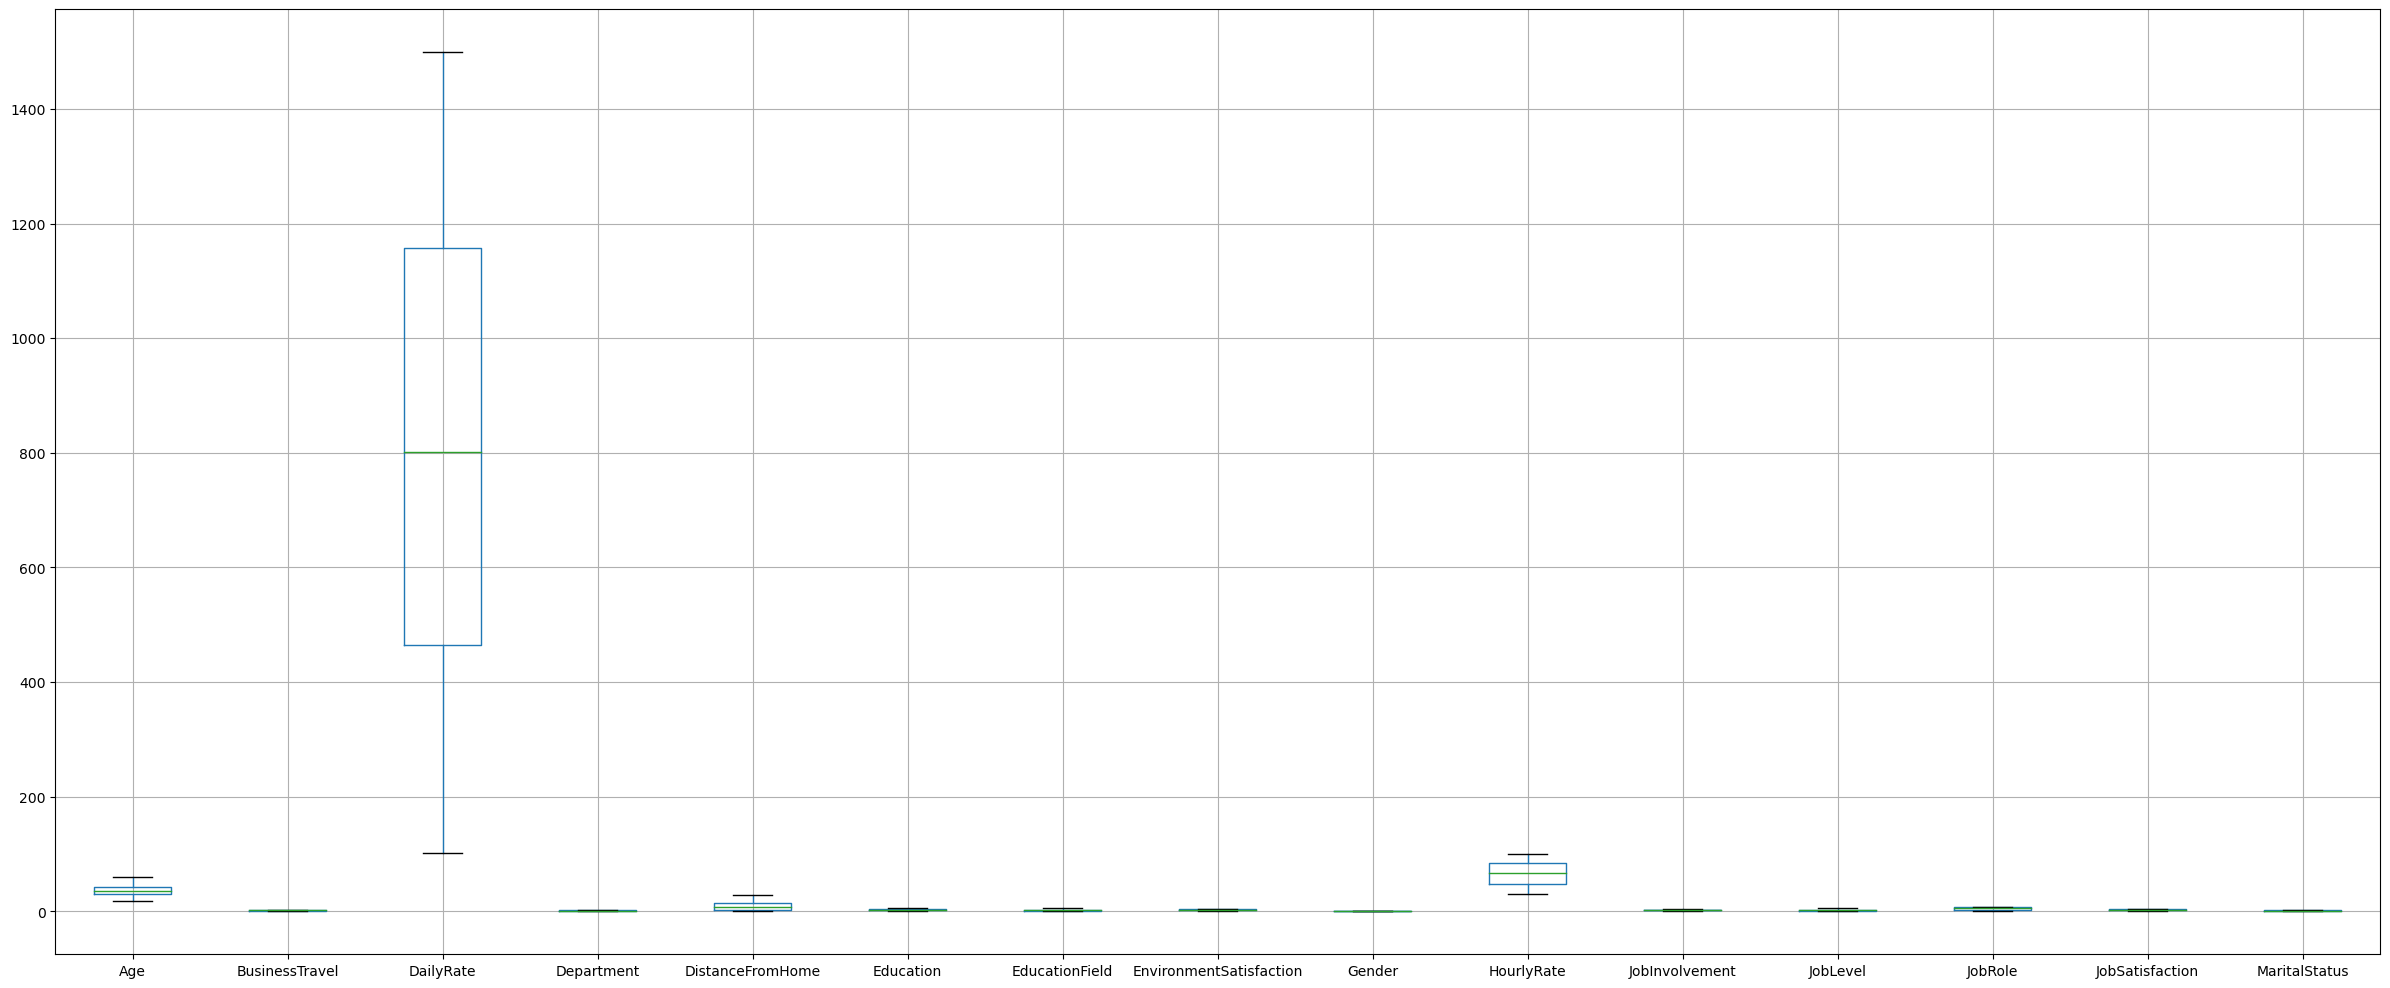

In [38]:
# Plotting boxplot for columns from 0 to 15

x.iloc[:,0:15].boxplot(figsize=[30,15])
plt.subplots_adjust(bottom =0.25)

plt.show()

- we can see that there is no outliers present for the columns from 0 to 15

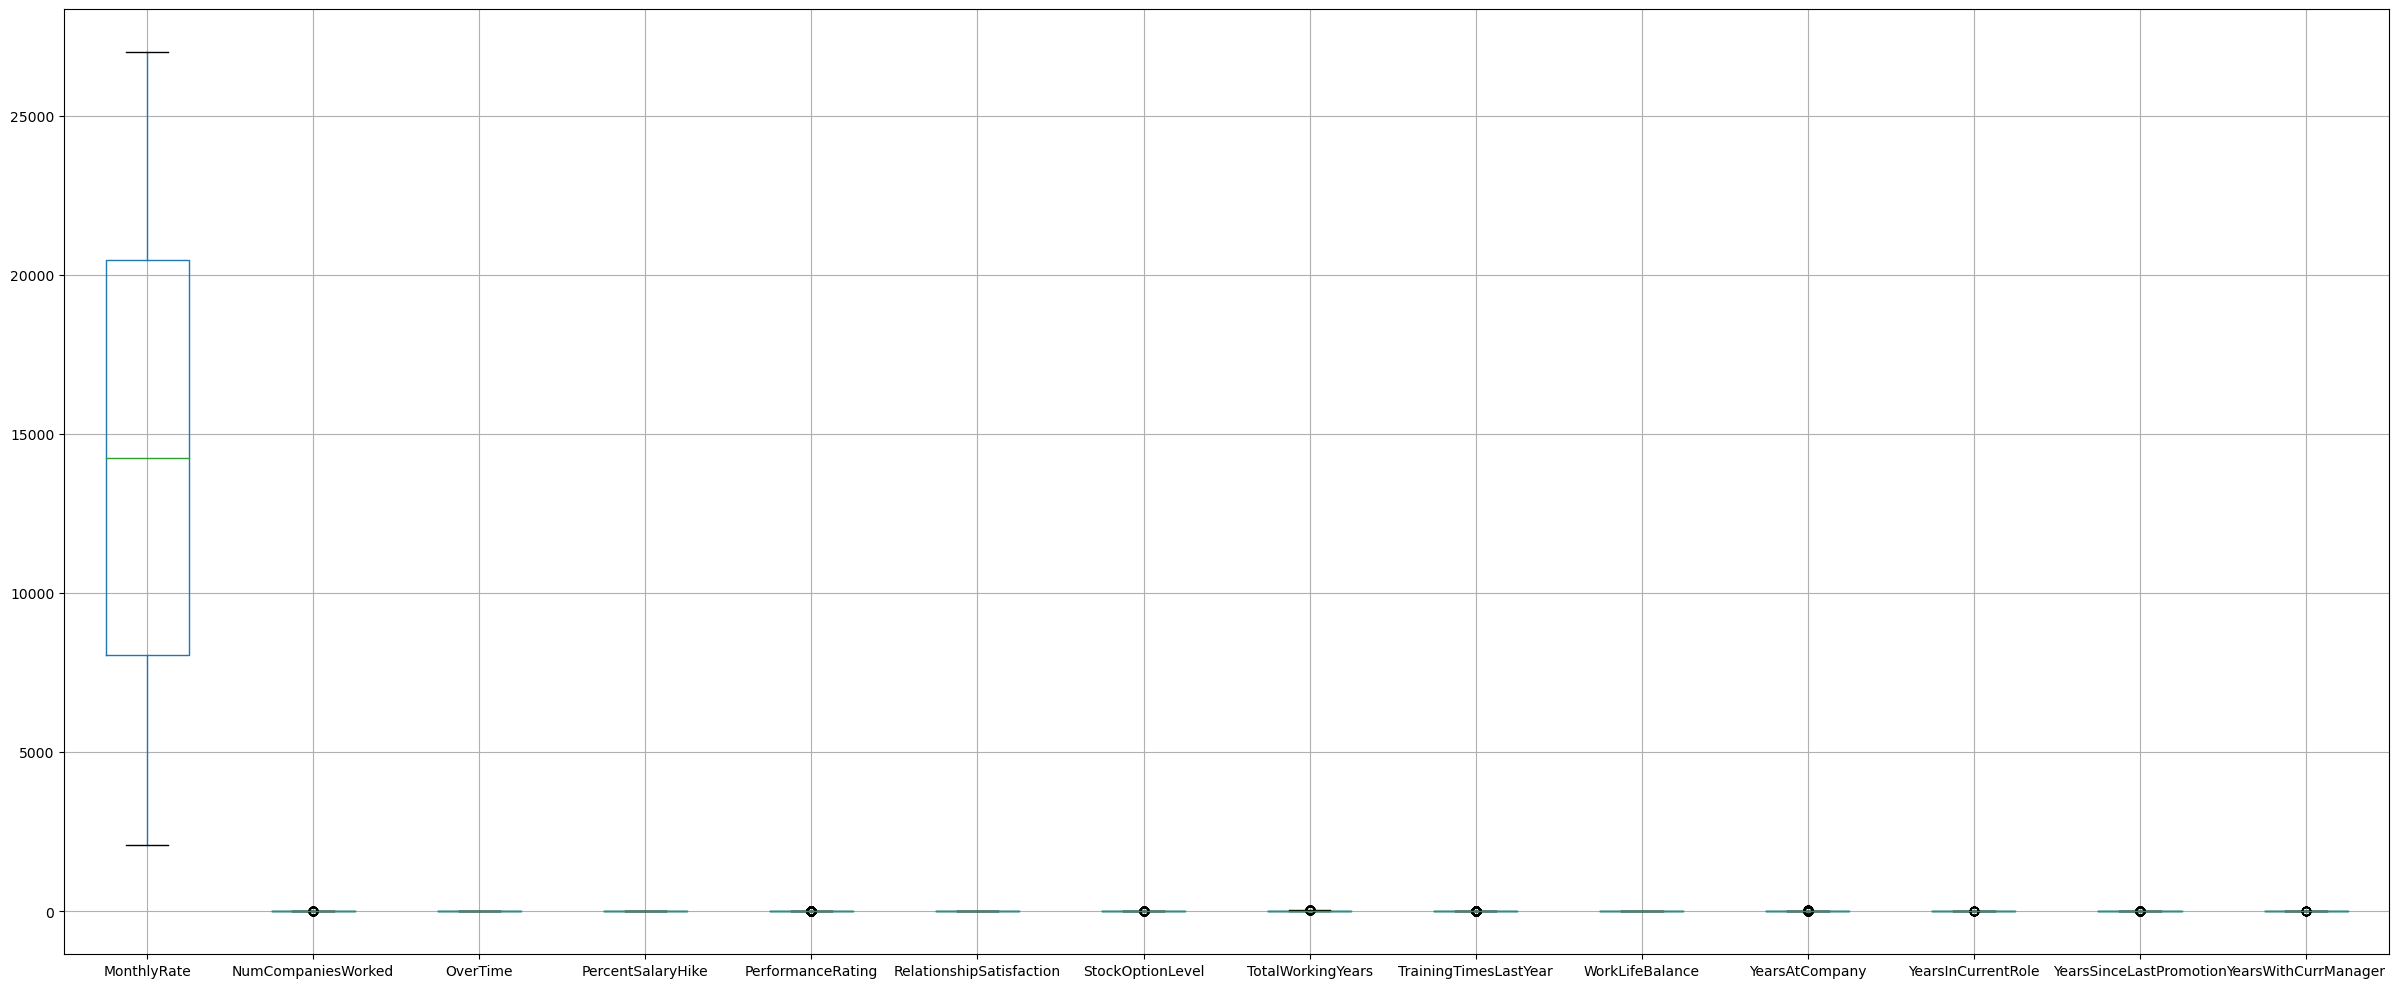

In [39]:
# Plotting boxplot for columns from 16 to 35

x.iloc[:,16:35].boxplot(figsize=[30,15])
plt.subplots_adjust(bottom =0.25)

plt.show()

- We can see that there is very few outliers present between the columns 16 to 35

#### Removing the outliers:

Z-Score Technique:

In [40]:
from scipy.stats import zscore
z = np.abs(zscore(x))
z.shape

(1470, 30)

In [41]:
thresholds = 3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([29, 28, 26, 28, 27, 28, 23, 23, 26, 28, 27, 28, 29, 23, 26, 28, 29,
       28, 23, 29, 26, 27, 28, 27, 29, 26, 28, 23, 26, 27, 28, 28, 29, 23,
       26, 26, 28, 28, 23, 27, 26, 26, 28, 26, 29, 28, 26, 23, 26, 28, 29,
       23, 29, 26, 28, 

In [42]:
# Checking the difference between the original data and after removing the outliers.

x_new = x[(z<3).all(axis=1)]
print('The shape of the original data ',x.shape)
print('The shape of the data after removing the outliers ',x_new.shape)

The shape of the original data  (1470, 30)
The shape of the data after removing the outliers  (1387, 30)


#### Calculating the percentage of data lost.



In [43]:
loss_percentage = ((1470-1387)/1470)*100

print ('The percentage of data lost is ', loss_percentage)

The percentage of data lost is  5.646258503401361


#### Scaleing the feature columns:

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.4463504 ,  0.59004834,  0.74252653, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521, -0.91319439, -1.2977746 , ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  ,  0.59004834,  1.41436324, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552,  0.59004834, -1.60518328, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521, -0.91319439,  0.54667746, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256,  0.59004834, -0.43256792, ..., -0.33939374,
        -0.36871529, -0.59522723]])

#### Handling data Imbalance by over sampling:

In [48]:
from imblearn.over_sampling import SMOTE
Sm = SMOTE()
x_over, y_over = Sm.fit_resample(x,y)

In [49]:
y_over.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

- We have made the target column balanced for better model building

#### Finding best random state:

In [50]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (0,200):
    x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size=0.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.8148648648648649  on Random_State  138


- We found that the best random_state value is 56. We'll create train_test split at random state = 178

#### Creating train_test Split:

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.30, random_state=178)

###### LogisticRegression:

In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7972972972972973
[[289  74]
 [ 76 301]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       363
           1       0.80      0.80      0.80       377

    accuracy                           0.80       740
   macro avg       0.80      0.80      0.80       740
weighted avg       0.80      0.80      0.80       740



- From LogisticRegression we're getting 82% accuracy score.

###### RandomForestClassifier:

In [53]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predRF = RF.predict(x_test)
print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test, predRF))

0.9459459459459459
[[353  10]
 [ 30 347]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       363
           1       0.97      0.92      0.95       377

    accuracy                           0.95       740
   macro avg       0.95      0.95      0.95       740
weighted avg       0.95      0.95      0.95       740



- From RandomForestClassifier we're getting 94% accuracy score.

###### DecisionTreeClassifier:

In [54]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.8445945945945946
[[301  62]
 [ 53 324]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       363
           1       0.84      0.86      0.85       377

    accuracy                           0.84       740
   macro avg       0.84      0.84      0.84       740
weighted avg       0.84      0.84      0.84       740



- From DecisionTreeClassifier, we're getting 84% accuracy score.

###### SVC:

In [55]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
predsv = svc.predict(x_test)
print(accuracy_score(y_test, predsv))
print(confusion_matrix(y_test, predsv))
print(classification_report(y_test, predsv))

0.9148648648648648
[[324  39]
 [ 24 353]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       363
           1       0.90      0.94      0.92       377

    accuracy                           0.91       740
   macro avg       0.92      0.91      0.91       740
weighted avg       0.92      0.91      0.91       740



- From SVC we're getting 92% accuracy score.

#### Selecting the best model:

Checking for cross validation score

In [56]:
#Checking cross validation score of LogisticRegression Classifier:

from sklearn.model_selection import cross_val_score

scr = cross_val_score(lr,x,y,cv=5)
print('Cross validation score for LogisticRegression is ',scr.mean())

Cross validation score for LogisticRegression is  0.865986394557823


In [57]:
# Checking cross validation score of RandomForest Classifier:

scr = cross_val_score(RF,x,y,cv=5)
print('Cross validation score for RandomForest is', scr.mean())

Cross validation score for RandomForest is 0.8564625850340135


In [58]:
# Checking cross validation score of DecisionTree Classifier:
scr = cross_val_score(dt,x,y,cv=5)
print('Cross validation score for DecisionTree is ', scr.mean())

Cross validation score for DecisionTree is  0.7816326530612245


In [59]:
# Checking cross validation score of SVC:

scr = cross_val_score(svc,x,y,cv=5)
print('Cross validation score for SVC is', scr.mean())

Cross validation score for SVC is 0.863265306122449


### Best Model:

- The minimum difference between accuracy score and cross validation score if of LogisticRegression So, LogisticRegression is the best model.

#### Hyper parameter tuning:

In [60]:
from sklearn.model_selection import GridSearchCV

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

GCV=GridSearchCV(LogisticRegression(),param_grid,refit = True, verbose = 3)

In [61]:
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ...........................C=1e-05;, score=0.506 total time=   0.0s
[CV 2/5] END ...........................C=1e-05;, score=0.530 total time=   0.0s
[CV 3/5] END ...........................C=1e-05;, score=0.530 total time=   0.0s
[CV 4/5] END ...........................C=1e-05;, score=0.539 total time=   0.0s
[CV 5/5] END ...........................C=1e-05;, score=0.525 total time=   0.0s
[CV 1/5] END ...........C=8.483428982440725e-05;, score=0.803 total time=   0.0s
[CV 2/5] END ...........C=8.483428982440725e-05;, score=0.646 total time=   0.0s
[CV 3/5] END ...........C=8.483428982440725e-05;, score=0.719 total time=   0.0s
[CV 4/5] END ...........C=8.483428982440725e-05;, score=0.701 total time=   0.0s
[CV 5/5] END ...........C=8.483428982440725e-05;, score=0.780 total time=   0.0s
[CV 1/5] END ...........C=0.0007196856730011522;, score=0.801 total time=   0.0s
[CV 2/5] END ...........C=0.0007196856730011522;

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])},
             verbose=3)

In [62]:
# Finding the best parameter found by GridSearchCV

GCV.best_params_

{'C': 0.05179474679231213}

In [63]:
# Printing how the model looks like after hyper-parameter tuning

GCV.best_estimator_

LogisticRegression(C=0.05179474679231213)

In [64]:
model = GCV.predict(x_test)

print(classification_report(y_test, model))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       363
           1       0.81      0.80      0.81       377

    accuracy                           0.80       740
   macro avg       0.80      0.80      0.80       740
weighted avg       0.80      0.80      0.80       740



- After hyper parameter tuning we got 82% accuracy score.

#### AUC ROC Curve:

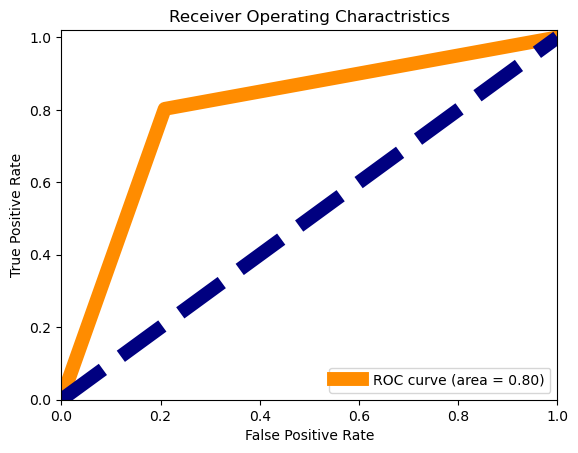

In [65]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(predlr, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color ='darkorange', lw=10, label ='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Charactristics')
plt.legend(loc='lower right')

plt.show()

### Saving the final model:

In [66]:
import pickle
filename = 'hr_analytics.pkl'
pickle.dump(lr, open(filename, 'wb'))

### Conclusion:

Checking the difference between the Original and Pridicted values

In [67]:
a = np.array(y_test)
predicted = np.array(lr.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,1,1
6,1,1
7,1,1
8,0,0
9,1,1
